In [26]:
import math
import numpy as np

In [2]:
import random

In [3]:
def nextTime(rateParam):
    return -math.log(1.0-random.random())/rateParam

def nextTime_np(rateParam):
    return random.expovariate(rateParam)

In [4]:
-math.log(0.2)*40

64.37751649736401

In [29]:
def acceptOrReject(baseRate, generatingRate):
    randomSample = random.random()
    if randomSample > generatingRate/baseRate:
        return False
    else:
        return True

In [27]:
def generateSample4Imhomogeneous(baseRate, generatingBaseRate, timeThreshold):
    generateIndex = 0
    baseIndex = 0
    lastGenerateTime = 0
    curGenerateTime = 0
    lastBaseTime = 0
    curBaseTime = 0
    generateTimeList = []
    
    while curGenerateTime < timeThreshold:
        timeInterval4Base = nextTime(baseRate)
        curBaseTime = lastBaseTime + timeInterval4Base
        generatingRate = obtainGenerateRate(generatingBaseRate, curBaseTime)
        if acceptOrReject(baseRate, generatingRate):
            curGenerateTime = curBaseTime
            generateTimeList.append(curGenerateTime)
            
        lastBaseTime = curBaseTime
    
    return generateTimeList

def obtainGenerateRate(generatingBaseRate, curTimeStamp):
    generatingRate = generatingBaseRate + np.sin(curTimeStamp)
    
    return generatingRate
    

In [9]:
def generateSample4Homogeneous(baseRate, timeThreshold):
    generateTimeList = []
    lastGenerateTime = 0
    
    while True:
        timeInterval4Base = nextTime(baseRate)
        curGenerateTime = lastGenerateTime+timeInterval4Base
        if curGenerateTime > timeThreshold:
            break
        else:
            generateTimeList.append(curGenerateTime)
        
        lastGenerateTime = curGenerateTime
            
    return generateTimeList


In [22]:
import matplotlib.pyplot as plt
def plotTimeLine(generateTimeList):
    generateTimeListLen = len(generateTimeList)
    y = [1 for i in range(generateTimeListLen)]
    c = ['red' for i in range(generateTimeListLen)]
    print generateTimeListLen
#     print generateTimeList, y
    plt.scatter(generateTimeList, y, color=c, s=30)
    
    plt.show()

44


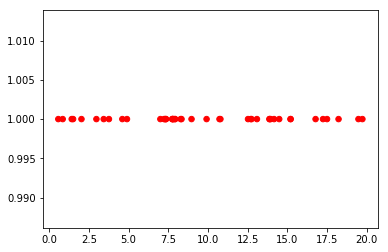

In [23]:
baseRate = 2
generatingBaseRate = 1
timeThreshold = 20

generateTimeList = generateSample4Homogeneous(baseRate, timeThreshold)

plotTimeLine(generateTimeList)

23


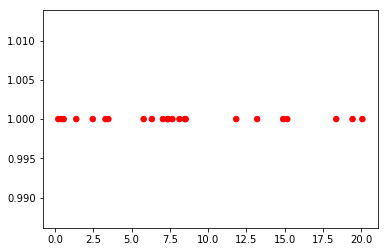

In [30]:
baseRate = 2
generatingBaseRate = 1
timeThreshold = 20

generateTimeList = generateSample4Imhomogeneous(baseRate, generatingBaseRate, timeThreshold)

plotTimeLine(generateTimeList)

In [34]:
def generateHPRate(HPBaseRate, influenceFactor, decayFactor, HPTimeList, curTime):
    historicalEffect = np.sum(influenceFactor*np.exp(-decayFactor*(curTime - np.array(HPTimeList))))
    HPRate = HPBaseRate + historicalEffect
    
    return HPRate

In [35]:
def generateHPSample(HPBaseRate, influenceFactor, decayFactor, timeThreshold):
    proposalTime = 0
    generateHPTime = 0
    generateHPTimeList = []
    lastHPRate = 0
    curHPRate = 0
    
    while proposalTime < timeThreshold:
        lastHPRate = generateHPRate(HPBaseRate, influenceFactor, decayFactor, generateHPTimeList, proposalTime)
        timeInterval = nextTime(lastHPRate)
        proposalTime = proposalTime + timeInterval
        curHPRate = generateHPRate(HPBaseRate, influenceFactor, decayFactor, generateHPTimeList, proposalTime)
        
        if acceptOrReject(lastHPRate, curHPRate):
            generateHPTime = proposalTime
            generateHPTimeList.append(generateHPTime)
    
    return generateHPTimeList

In [36]:
HPBaseRate = 1.2
influenceFactor = 0.6
decayFactor = 0.8
timeThreshold = 20

generateHPTimeList = generateHPSample(HPBaseRate, influenceFactor, decayFactor, timeThreshold)

81


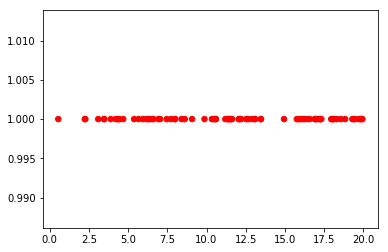

In [37]:
plotTimeLine(generateHPTimeList)

In [31]:
a = [1, 2,3]

In [32]:
np.exp(np.array(a))

array([  2.71828183,   7.3890561 ,  20.08553692])